<a href="https://colab.research.google.com/github/pavankalyan25853/CVIPDATASCIENCE/blob/main/Email%20spam%20dettection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
email=pd.read_csv('/content/spam.csv')

In [3]:
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
email.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [5]:
email.shape

(5572, 2)

In [6]:
email.size

11144

In [7]:
email.columns=email.columns.str.strip()

In [8]:
email.columns=email.columns.str.lower()

In [9]:
email.columns

Index(['category', 'message'], dtype='object')

In [10]:
email.isna().sum()

category    0
message     0
dtype: int64

In [11]:
email[email.duplicated(subset=['category','message'],keep=False)]

,category,message
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [12]:
email.drop_duplicates(subset=['category','message'],keep='first',inplace=True)

In [13]:
email.shape

(5157, 2)

In [14]:
email.size

10314

In [15]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   object
 1   message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [16]:
email['category'].value_counts().to_frame()

,category
ham,4516
spam,641


In [17]:
email.loc[email['category']=='spam','category']=1
email.loc[email['category']=='ham','category']=0

In [18]:
email['category']=email['category'].astype('int64')

In [19]:
email.describe()

,category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
email.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5157 non-null   int64 
 1   message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [21]:
email.describe()

,category
count,5157.000000
mean,0.124297
std,0.329952
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


<Axes: xlabel='category', ylabel='count'>

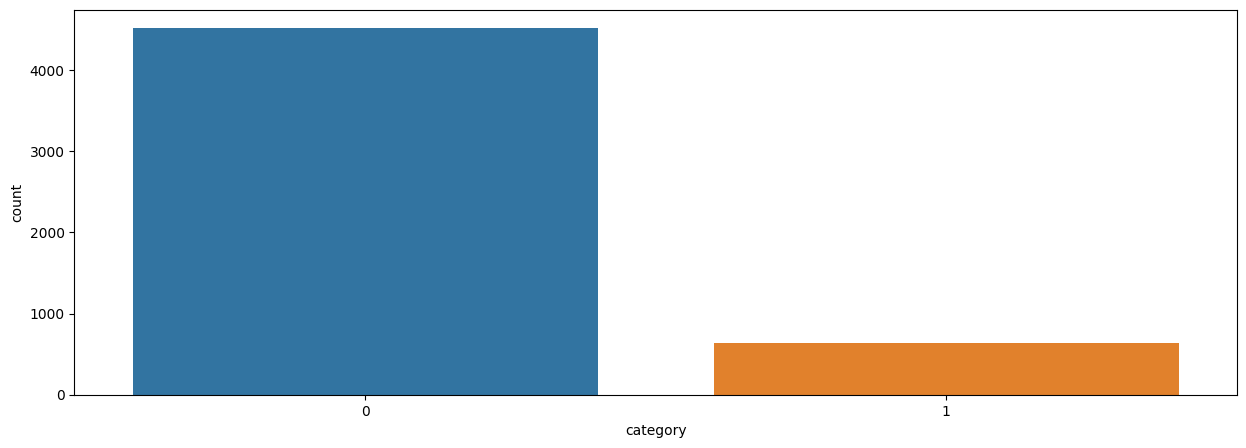

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(data=email,x='category')

In [23]:
email['category'].value_counts().to_frame()

,category
0,4516
1,641


In [24]:
from sklearn.utils import resample

In [25]:
email_majority=email[email['category']==0]
email_minority=email[email['category']==1]

In [26]:
email_majority_downsample=resample(email_majority,replace=False,n_samples=641,random_state=42)

In [27]:
email_df=pd.concat([email_majority_downsample,email_minority])

In [28]:
email_df['category'].value_counts().to_frame()

,category
0,641
1,641


<Axes: xlabel='category', ylabel='count'>

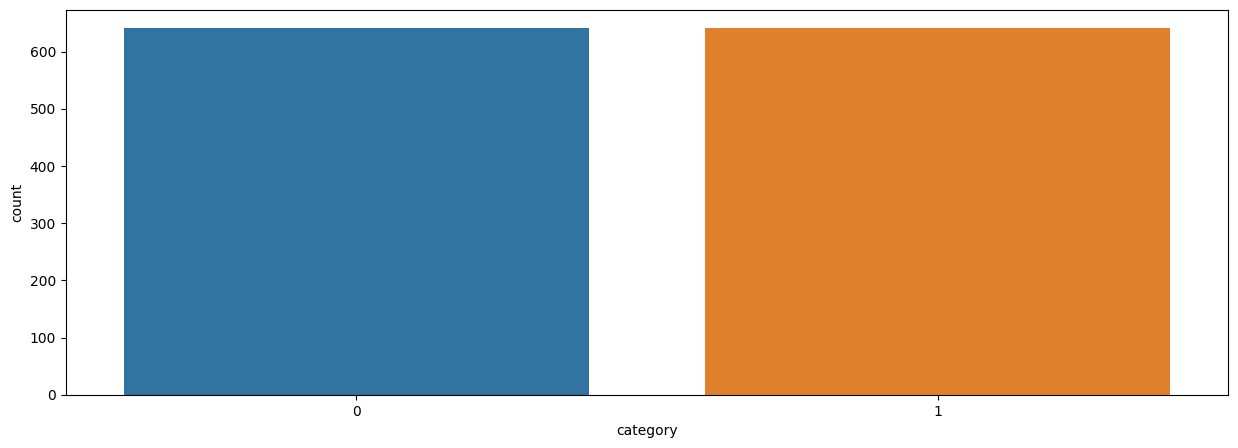

In [29]:
plt.figure(figsize=(15,5))
sns.countplot(data=email_df,x='category')

In [30]:
x=email_df['message']
y=email_df['category']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [33]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((897,), (385,), (897,), (385,))

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [35]:
fe=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [36]:
x_train_fe=fe.fit_transform(x_train)
x_test_fe=fe.transform(x_test)

In [37]:
x_train_fe

<897x3360 sparse matrix of type '<class 'numpy.float64'>'
	with 9708 stored elements in Compressed Sparse Row format>

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
lr=LogisticRegression(max_iter=500)

In [40]:
lr.fit(x_train_fe,y_train)

LogisticRegression(max_iter=500)

In [41]:
lr.score(x_train_fe,y_train)

0.9888517279821628

In [42]:
lr.score(x_test_fe,y_test)

0.9558441558441558

In [43]:
y_pred=lr.predict(x_test_fe)

In [44]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score,ConfusionMatrixDisplay

In [45]:
precision_score(y_test,y_pred)

0.9766081871345029

In [46]:
recall_score(y_test,y_pred)

0.9277777777777778

In [47]:
accuracy_score(y_test,y_pred)

0.9558441558441558

In [48]:
f1_score(y_test,y_pred)

0.9515669515669516

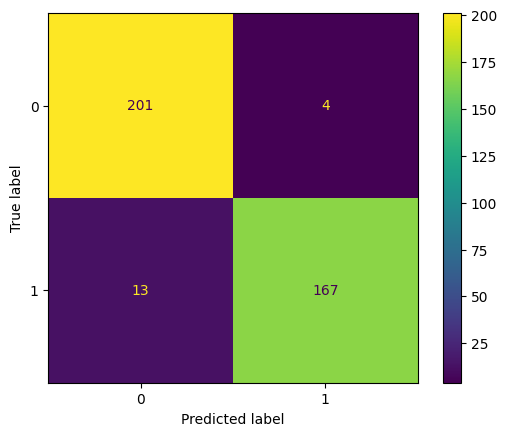

In [49]:
cmd=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,y_pred,labels=lr.classes_),display_labels=lr.classes_)
cmd.plot()

In [50]:
enter_your_mail=['i am happy to do dinner with you']

In [51]:
input_mail_features=fe.transform(enter_your_mail)

In [52]:
predict=lr.predict(input_mail_features)

In [53]:
if predict==1:
    print('mail is spam')
else:
    print('mail is not spam')

mail is not spam
